<h1>Home Credit Deault Risk Machine Learning Module</h1>
<p>Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.
<p>Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.</p>


<h1> Importing Modules </h1>
for this datasets, we would import some of the modules to eneble us load and visualize our dataset

In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Loading Datasets </h1>
Loading the train and test datasets

In [2]:
#loading and viewing the train datasets
train = pd.read_csv('C:\\Users\\SALIU\\OneDrive\\Desktop\\Data science\\Datasets\\Loan dataset\\application_train.csv')
pd.set_option('display.max_columns', 500)
display(train.head())
print( "The number of rows in the train datasets is {row}, the number of colunms in the dataset is {col}".format(row=train.shape[0],col=train.shape[1]))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

The number of rows in the train datasets is 307511, the number of colunms in the dataset is 122


<p> The train datasets contain all information neccesary to create our model and an additional "Target" colunm.</p>

<h1> The TARGET Colunm </h1>
The "TARGET" colunm in our datasets is divided into 0 and 1. 1 representing clients with payment difficulties and 0 representing clients who paid their loans ontime. Let us check the parcentage of our datasets that paid their loand ontime

,Target,Percentage
0,0,0.92
1,1,0.08


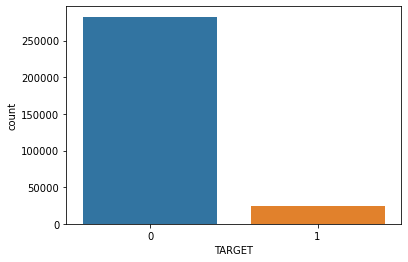

In [3]:
# checking the percentage of ontime payment and late payment
# plotting data on chart
sns.countplot(x='TARGET',data=train)
pd.DataFrame(train['TARGET'].value_counts(normalize=True).round(2)).reset_index().rename(columns={'index':'Target','TARGET':'Percentage'})

<p> Only 0.08 percent of the clients paid their loans ontime</p>

<h2> Missing Values</h2>
The presence of missing values can greatly affect the accuracy of our model .

In [4]:
#define a function that can calculate the percentage of missing values
def missing_values(df):
  
  missing_values= df.isnull().sum().round(2)
  missing_values_perc=(missing_values*100/len(df)).round(2)
  missing_values_table=(pd.concat([missing_values,missing_values_perc],axis=1)).reset_index()
  missing_values_table.rename(columns={0:'missing values',1:'percentage','index':'columns'},inplace=True)
  missing_values_table.sort_values(by='percentage',ascending=False,inplace=True)
  return missing_values_table


In [6]:
missing_values_train=missing_values(train)
missing_values_train[missing_values_train['missing values']!=0]

,columns,missing values,percentage
76,COMMONAREA_MEDI,214865,69.87
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...,...
42,EXT_SOURCE_2,660,0.21
10,AMT_GOODS_PRICE,278,0.09
95,DAYS_LAST_PHONE_CHANGE,1,0.00
29,CNT_FAM_MEMBERS,2,0.00


<h2> Splitting the DataFrame</h2>
It is important to split the dataframe into training and testing data before any further operation on the dataset.

In [14]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(train, test_size=0.2, random_state=42,stratify=train.TARGET)
print('Training shape: ', cc_apps_train.shape)
print('Testing shape: ', cc_apps_test.shape)

Training shape:  (246008, 122)
Testing shape:  (61503, 122)


In [15]:
cc_apps_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,310536,0,Cash loans,F,N,N,2,90000.0,227520.0,13189.5,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008230,-12298,-946,-6378.0,-4670,NaN,1,1,0,1,0,0,Laborers,4.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 2,0.384582,0.289573,0.622922,0.2227,0.1613,0.9851,0.7960,0.0736,0.32,0.2759,0.3333,0.3750,0.0650,0.1816,0.2281,0.0000,0.0000,0.2269,0.1673,0.9851,0.8040,0.0742,0.3222,0.2759,0.3333,0.3750,0.0665,0.1983,0.2377,0.0000,0.0000,0.2248,0.1613,0.9851,0.7987,0.0740,0.32,0.2759,0.3333,0.3750,0.0661,0.1847,0.2322,0.0000,0.0000,reg oper account,block of flats,0.2197,Panel,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
229245,365516,0,Cash loans,M,Y,Y,0,90000.0,161730.0,13095.0,135000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.003069,-15375,-92,-1292.0,-1994,23.0,1,1,0,1,0,0,Drivers,2.0,3,3,TUESDAY,13,0,0,0,0,1,1,Other,NaN,0.514261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-509.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
122525,242055,1,Cash loans,M,N,Y,0,135000.0,728847.0,26307.0,553500.0,"Spouse, partner",Working,Secondary / secondary special,Single / not married,House / apartment,0.020713,-19307,-1646,-7951.0,-2842,NaN,1,1,0,1,1,0,Laborers,1.0,3,2,TUESDAY,5,0,0,0,0,0,0,Business Entity Type 3,NaN,0.486906,0.598926,0.1485,0.1124,0.9891,0.8504,0.0383,0.16,0.1379,0.3750,0.4167,0.3064,0.1210,0.1614,0.0000,0.0000,0.1513,0.1166,0.9891,0.8563,0.0387,0.1611,0.1379,0.3750,0.4167,0.3133,0.1322,0.1681,0.0000,0.0000,0.1499,0.1124,0.9891,0.8524,0.0386,0.16,0.1

<h2> Encoding The Categorical variables</h2>
its important to take note of the categorical variable in the dataframe so that we can represent them in the manner the machine learning model can maximixe for better model accuracy.

In [16]:
#colunm type of the train dataset
print(cc_apps_train.dtypes.value_counts())
# unique value in the train dataset object type
print(cc_apps_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

float64    65
int64      41
object     16
dtype: int64
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


In [17]:
cc_apps_train.dtypes == 'object'

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE             True
CODE_GENDER                    True
FLAG_OWN_CAR                   True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool

In [18]:
# Impute the categorical missing values
# Iterate over each column of cc_apps_train
def impute_missing_values(df):
    # impute numerical variables
    num_vars = df.select_dtypes(include='number').columns
    for var in num_vars:
        df[var].fillna(df[var].mean(), inplace=True)
        
    # impute categorical variables
    cat_vars = df.select_dtypes(exclude='number').columns
    for var in cat_vars:
        df[var].fillna(df[var].mode()[0], inplace=True)
        
    return df
# Count the number of NaNs in the dataset and print the counts to verify
impute_missing_values(cc_apps_train)
impute_missing_values(cc_apps_test)
print(cc_apps_train.isnull().sum().sort_values(ascending=False))
print(cc_apps_test.isnull().sum().sort_values(ascending=False))

c:\Users\SALIU\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SK_ID_CURR                     0
OBS_30_CNT_SOCIAL_CIRCLE       0
WALLSMATERIAL_MODE             0
TOTALAREA_MODE                 0
HOUSETYPE_MODE                 0
                              ..
LIVE_REGION_NOT_WORK_REGION    0
REG_REGION_NOT_WORK_REGION     0
REG_REGION_NOT_LIVE_REGION     0
HOUR_APPR_PROCESS_START        0
AMT_REQ_CREDIT_BUREAU_YEAR     0
Length: 122, dtype: int64
SK_ID_CURR                     0
OBS_30_CNT_SOCIAL_CIRCLE       0
WALLSMATERIAL_MODE             0
TOTALAREA_MODE                 0
HOUSETYPE_MODE                 0
                              ..
LIVE_REGION_NOT_WORK_REGION    0
REG_REGION_NOT_WORK_REGION     0
REG_REGION_NOT_LIVE_REGION     0
HOUR_APPR_PROCESS_START        0
AMT_REQ_CREDIT_BUREAU_YEAR     0
Length: 122, dtype: int64


In [19]:
cc_apps_train.sample(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
237020,374531,0,Cash loans,M,N,Y,0,180000.0,254700.0,27153.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,With parents,0.022800,-9753,-619,-3967.0,-2262,12.057363,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,14,1,1,0,1,1,0,Business Entity Type 3,0.501650,0.670958,0.510871,0.134000,0.093900,0.987100,0.823200,0.027200,0.00000,0.137900,0.250000,0.041700,0.040600,0.108400,0.158600,0.003900,0.148400,0.136600,0.057600,0.987100,0.830100,0.02750,0.000000,0.069000,0.166700,0.041700,0.041500,0.118500,0.100500,0.003900,0.002200,0.135300,0.093900,0.987100,0.82560,0.027400,0.000000,0.137900,0.250000,0.041700,0.041300,0.110300,0.161500,0.003900,0.151500,not specified,block of flats,0.176600,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50039,157924,1,Cash loans,F,N,Y,2,328500.0,636826.5,50445.0,576000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-15096,-2641,-826.0,-345,12.057363,1,1,0,1,1,0,Core staff,4.0,3,1,THURSDAY,7,0,0,0,0,0,0,Kindergarten,0.713203,0.540374,0.339288,0.054600,0.056400,0.987600,0.830000,0.015700,0.08000,0.069000,0.333300,0.041700,0.020400,0.044500,0.075900,0.000000,0.000000,0.055700,0.058500,0.987600,0.836700,0.01580,0.080600,0.069000,0.333300,0.041700,0.020900,0.048700,0.079100,0.000000,0.000000,0.055200,0.056400,0.987600,0.83230,0.015800,0.080000,0.069000,0.333300,0.041700,0.020800,0.045300,0.077300,0.000000,0.000000,reg oper account,block of flats,0.068300,Panel,No,0.0,0.0,0.0,0.0,-2335.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13904,116209,0,Revolving loans,F,N,Y,0,135000.0,225000.0,11250.0,225000.0,Unaccompanied,Pensioner,Higher education,Widow,House / 

In [21]:
cc_apps_train=pd.get_dummies(cc_apps_train)
cc_apps_test=pd.get_dummies(cc_apps_test)
print('Training shape: ', cc_apps_train.shape)
print('Testing shape: ', cc_apps_test.shape)

Training shape:  (246008, 246)
Testing shape:  (61503, 245)


In [22]:
#There is a disparity in number of colunms in the train and test datasets, we are performing an alignment of both datasets
# Align the training and testing data
cc_apps_train, cc_apps_test = cc_apps_train.align(cc_apps_test, join ='inner', axis = 1)

print('Training shape: ', cc_apps_train.shape)
print('Testing shape: ', cc_apps_test.shape)

Training shape:  (246008, 245)
Testing shape:  (61503, 245)


<h2>Preprocessing The Data</h2>
we would impute the missing values and scale the dataset

In [23]:
from sklearn.preprocessing import MinMaxScaler
# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.drop(columns="TARGET").values, cc_apps_train['TARGET'].values
X_test, y_test = cc_apps_test.drop(columns="TARGET").values, cc_apps_test['TARGET'].values
#scale the dataset
scaler=MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2> Regresions Model</h2>
Our data set is now reay to develope a model to predict loan repayment propability

In [24]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
reg = LogisticRegression(max_iter=500)

# Fit logreg to the train set
reg.fit(X_train,y_train)

c:\Users\SALIU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [25]:
from sklearn.metrics import confusion_matrix
# Make predictions
y_pred = reg.predict(X_test)
# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", reg.score(X_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.919434824317513
[[56492    46]
 [ 4909    56]]


In [ ]:
<h2> SUMMARY </h2>
In summary, we have developed a model with the ability to predict if an individual will default or make timely
payment if given a loan with a 92% accuracy.